In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/adals/Downloads/archive (2)/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df["sex"].unique()
df["smoker"].unique()
#df["region"].unique()

array(['yes', 'no'], dtype=object)

In [6]:
df["sex"]=df["sex"].replace(['female', 'male'],[0,1])
df["region"]=df["region"].replace(['southwest', 'southeast', 'northwest', 'northeast'],[0,1,2,3])
df["smoker"]=df["smoker"].replace(['yes', 'no'],[0,1])




In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [8]:
X=df.drop(columns=["charges"])
y=df["charges"]

### matplotlib

## barplot

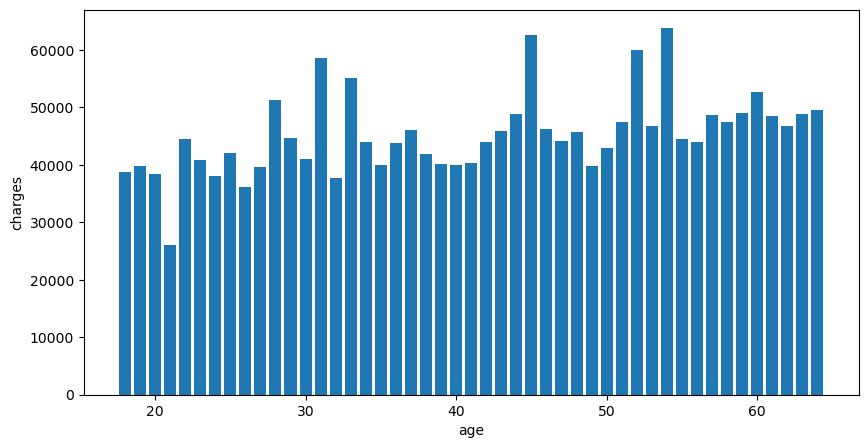

In [9]:
plt.figure(figsize=[10,5])
plt.bar(df["age"],y)
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

## histogram

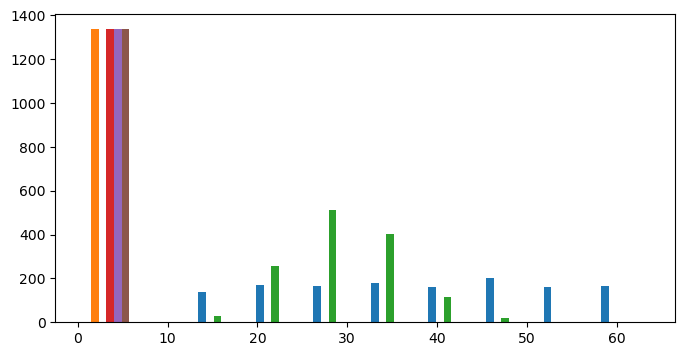

In [10]:
plt.figure(figsize=[8,4])
plt.hist(X)
#plt.xlabel(X)
plt.show()

## scatterplot

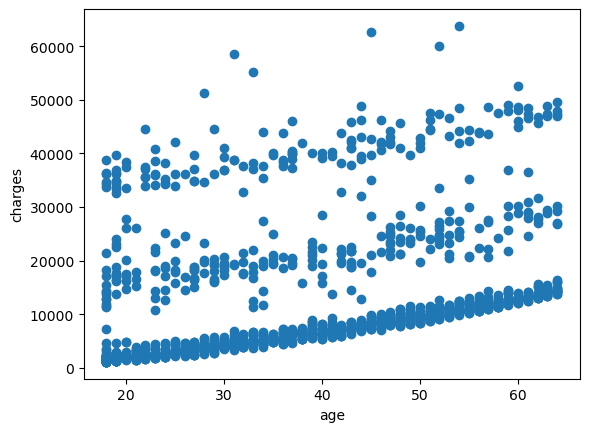

In [11]:
plt.scatter(df["age"],y)
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

## pie

([<matplotlib.patches.Wedge at 0x26809daa1d0>,
 [Text(6.735557395310444e-17, 1.1, '0'),
  Text(-0.5500000148652439, 0.9526279355804298, '1'),
  Text(-0.95262790983307, -0.5500000594609754, '2'),
  Text(1.0999999999999954, 1.0298943244593887e-07, '3')],
 [Text(3.6739403974420595e-17, 0.6, '0.0%'),
  Text(-0.3000000081083148, 0.5196152375893253, '16.7%'),
  Text(-0.5196152235453109, -0.3000000324332593, '33.3%'),
  Text(0.5999999999999974, 5.6176054061421195e-08, '50.0%')])

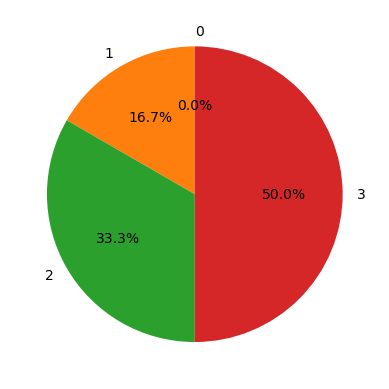

In [12]:
plt.pie(df["region"].unique(),labels=df["region"].unique(),autopct='%1.1f%%', startangle=90)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

## regression

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_predict = model.predict(X_test)

In [17]:
data1 = pd.DataFrame({"actual":y_test,"predicted":y_predict})

In [18]:
data1

,actual,predicted
665,42560.43040,35771.703512
549,45863.20500,37953.361624
812,11013.71190,8923.438826
261,17085.26760,25944.626028
918,13041.92100,12117.287373
...,...,...
851,14119.62000,15016.590239
218,3392.97680,4780.428719
88,8026.66660,9025.798400
1134,19673.33573,6237.885557


Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
mean_absolute_err = mean_absolute_error(y_test,y_predict)
mean_squared = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print("mean absolute error:",mean_absolute_err)
print("mean squared error:",mean_squared)
print("r2 score:", r2)

mean absolute error: 3772.269829761059
mean squared error: 31409532.399779305
r2 score: 0.7570571765886516


### SVM

In [21]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train,y_train)

SVR()

In [22]:
svr_predict = svr_model.predict(X_test)

Evaluation

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


svr_mean_absolute_err = mean_absolute_error(y_test,svr_predict)
svr_mean_squared = mean_squared_error(y_test,svr_predict)
svr_r2 = r2_score(y_test,svr_predict)
print("svr_mean absolute error:",svr_mean_absolute_err)
print("svr_mean squared error:",svr_mean_squared)
print("svr_r2 score:", svr_r2)

svr_mean absolute error: 7489.199118209282
svr_mean squared error: 139253785.3742058
svr_r2 score: -0.07708409532913651


### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [25]:
tree_predict = tree_model.predict(X_test)

Evaluation


In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


tree_mean_absolute_err = mean_absolute_error(y_test,tree_predict)
tree_mean_squared = mean_squared_error(y_test,tree_predict)
tree_r2 = r2_score(y_test,tree_predict)
print("tree_mean absolute error:",tree_mean_absolute_err)
print("tree_mean squared error:",tree_mean_squared)
print("tree_r2 score:", tree_r2)

tree_mean absolute error: 3005.06811619403
tree_mean squared error: 39727038.1009844
tree_r2 score: 0.6927238941611502


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
forest_predict = forest_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


forest_mean_absolute_err = mean_absolute_error(y_test,forest_predict)
forest_mean_squared = mean_squared_error(y_test,forest_predict)
forest_r2 = r2_score(y_test,forest_predict)
print("forest_mean absolute error:",forest_mean_absolute_err)
print("forest_mean squared error:",forest_mean_squared)
print("forest_r2 score:", forest_r2)

forest_mean absolute error: 2678.237661545919
forest_mean squared error: 21630635.20094903
forest_r2 score: 0.8326938611815697


## AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(X_train,y_train)

AdaBoostRegressor()

In [35]:
ada_predict= adaboost.predict(X_test)

Evaluation

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


adaboost_mean_absolute_err = mean_absolute_error(y_test,ada_predict)
adaboost_mean_squared = mean_squared_error(y_test,ada_predict)
adaboost_r2 = r2_score(y_test,ada_predict)
print("adaboost_mean absolute error:",adaboost_mean_absolute_err)
print("adaboost_mean squared error:",adaboost_mean_squared)
print("adaboost_r2 score:", adaboost_r2)

adaboost_mean absolute error: 3864.1430828080834
adaboost_mean squared error: 22659330.639254022
adaboost_r2 score: 0.8247372265194777


### Evaluation Summmary


In [51]:
#Linear_Regression
print("Linear Regression")
print()
print("mean absolute error:",mean_absolute_err)
print("mean squared error:",mean_squared)
print("r2 score:", r2)
print()



#SVM
print("SVM")
print()


print("mean absolute error:",svr_mean_absolute_err)
print("mean squared error:",svr_mean_squared)
print("r2 score:", svr_r2)
print()


#decision tree
print("DEcision Tree")
print()


print("mean absolute error:",tree_mean_absolute_err)
print("mean squared error:",tree_mean_squared)
print("r2 score:", tree_r2)
print()

#random Forest
print("Random Forest")
print()


print("mean absolute error:",forest_mean_absolute_err)
print("mean squared error:",forest_mean_squared)
print("r2 score:", forest_r2)
print()


#ADABoost
print("ADABoost")
print()


print("mean absolute error:",adaboost_mean_absolute_err)
print("mean squared error:",adaboost_mean_squared)
print("r2 score:", adaboost_r2)
print()


Linear Regression

mean absolute error: 3772.269829761059
mean squared error: 31409532.399779305
r2 score: 0.7570571765886516

SVM

mean absolute error: 7489.199118209282
mean squared error: 139253785.3742058
r2 score: -0.07708409532913651

DEcision Tree

mean absolute error: 3005.06811619403
mean squared error: 39727038.1009844
r2 score: 0.6927238941611502

Random Forest

mean absolute error: 2678.237661545919
mean squared error: 21630635.20094903
r2 score: 0.8326938611815697

ADABoost

mean absolute error: 3864.1430828080834
mean squared error: 22659330.639254022
r2 score: 0.8247372265194777

